In [41]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#missingno is a library for visualizing missing data

plt.style.use('default')

# Data Analysis and Preprocessing
- 1.Load the CSV dataset into a Pandas DataFrame.
- 2.Handle missing values, considering different strategies for different columns.
- 3.Analyze customer interactions by calculating the total number of actions (purchases,
   views, etc.) for each customer

In [42]:
ec = pd.read_csv('using dataset/ecommerce_data.csv')
ec.head()

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,NaN,2,View
4,1061,2023-01-05,17,NaN,NaN,5,Purchase


In [43]:
ec.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   int64  
 1   Timestamp   1000 non-null   object 
 2   ProductID   1000 non-null   int64  
 3   Category    900 non-null    object 
 4   Price       900 non-null    float64
 5   Quantity    1000 non-null   int64  
 6   Action      1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


#  Handle missing 
- Hrer i see missing valu in  (Category) and ( Price  )
- Step 4: Handle missing 'Category' (Categorical)
# Replace missing Category with the most frequent one (mode)


In [44]:
category_mode = ec['Category'].mode()[0]

ec['Category'].fillna(category_mode, inplace=True)

C:\Users\estya\AppData\Local\Temp\ipykernel_22608\4088011027.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ec['Category'].fillna(category_mode, inplace=True)


In [45]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   int64  
 1   Timestamp   1000 non-null   object 
 2   ProductID   1000 non-null   int64  
 3   Category    1000 non-null   object 
 4   Price       900 non-null    float64
 5   Quantity    1000 non-null   int64  
 6   Action      1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


# Handle missing 'Price' (Numerical)
-  First fill based on median within each Category

In [46]:
def fill_price(row):
    if pd.isnull(row['Price']):
        return category_medians.get(row['Category'], global_median)
    return row['Price']
#
category_medians = ec.groupby('Category')['Price'].median().to_dict()
# Calculate the global median for 'Price'

global_median = ec['Price'].median()
ec['Price'] = ec.apply(fill_price, axis=1)
#

In [47]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   int64  
 1   Timestamp   1000 non-null   object 
 2   ProductID   1000 non-null   int64  
 3   Category    1000 non-null   object 
 4   Price       1000 non-null   float64
 5   Quantity    1000 non-null   int64  
 6   Action      1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


Missing values before handling:
 CustomerID    0
Timestamp     0
ProductID     0
Category      0
Price         0
Quantity      0
Action        0
dtype: int64


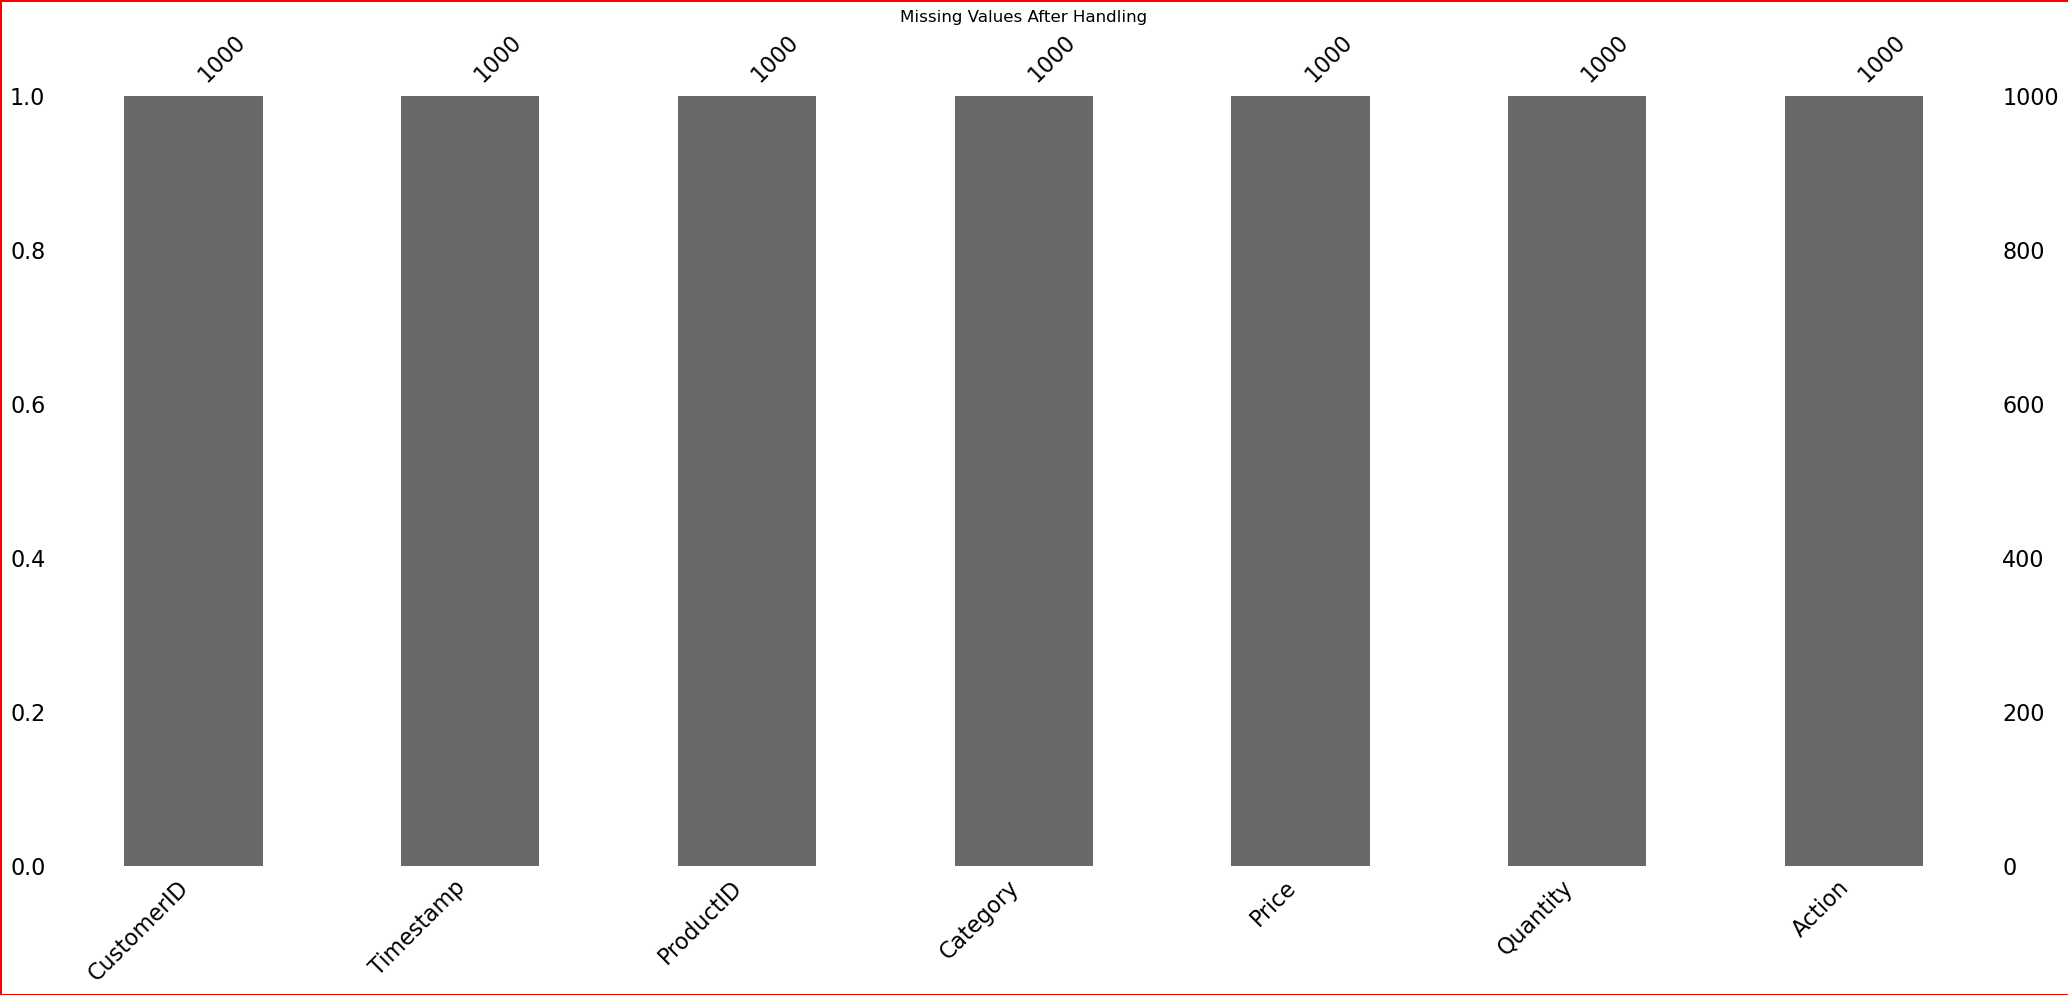

In [48]:
print("Missing values before handling:\n", ec.isnull().sum())
plt.figure(figsize=(10, 4), dpi=100, facecolor='w',edgecolor='red', linewidth=1)
msno.bar(ec)
plt.title("Missing Values After Handling")
plt.show()

# Analyze customer interactions by calculating the total number of actions (purchases,views, etc.) for each customer.

In [49]:
actions_per_customer = (
    ec.groupby('CustomerID')
      .size()
      .reset_index(name='TotalActions')
      .sort_values(by='TotalActions', ascending=False)
)

actions_per_customer.head()

,CustomerID,TotalActions
89,1090,20
91,1092,19
61,1062,19
98,1099,18
32,1033,18


In [52]:
top25 = actions_per_customer.head(25)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

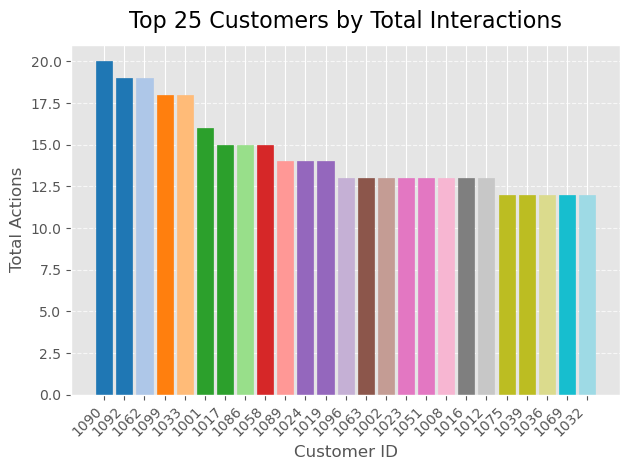

In [56]:

plt.style.use('ggplot')
bars = plt.bar(
    top25['CustomerID'].astype(str),  # convert IDs to string for x-axis
    top25['TotalActions'],
    
)

for i, bar in enumerate(bars):
    bar.set_color(plt.cm.tab20(i / len(bars)))

# Labels and title
plt.title('Top 25 Customers by Total Interactions', fontsize=16, pad=12)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Actions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Feature Engineering and Analysis

- Create a new feature TotalSpent by calculating the total amount spent by each customer

In [58]:
purchases = ec[ec['Action'] == 'Purchase'].copy()
# Compute spending per row
purchases['Spent'] = purchases['Price'] * purchases['Quantity']
# Sum spent per customer
spend_per_customer = (
    purchases.groupby('CustomerID')['Spent']
             .sum()
             .reset_index(name='TotalSpent')
             .sort_values(by='TotalSpent', ascending=False)
)
spend_per_customer.head()


,CustomerID,TotalSpent
91,1092,12070.523164
61,1062,9438.754884
38,1039,9133.567806
44,1045,7758.889706
52,1053,7745.386587


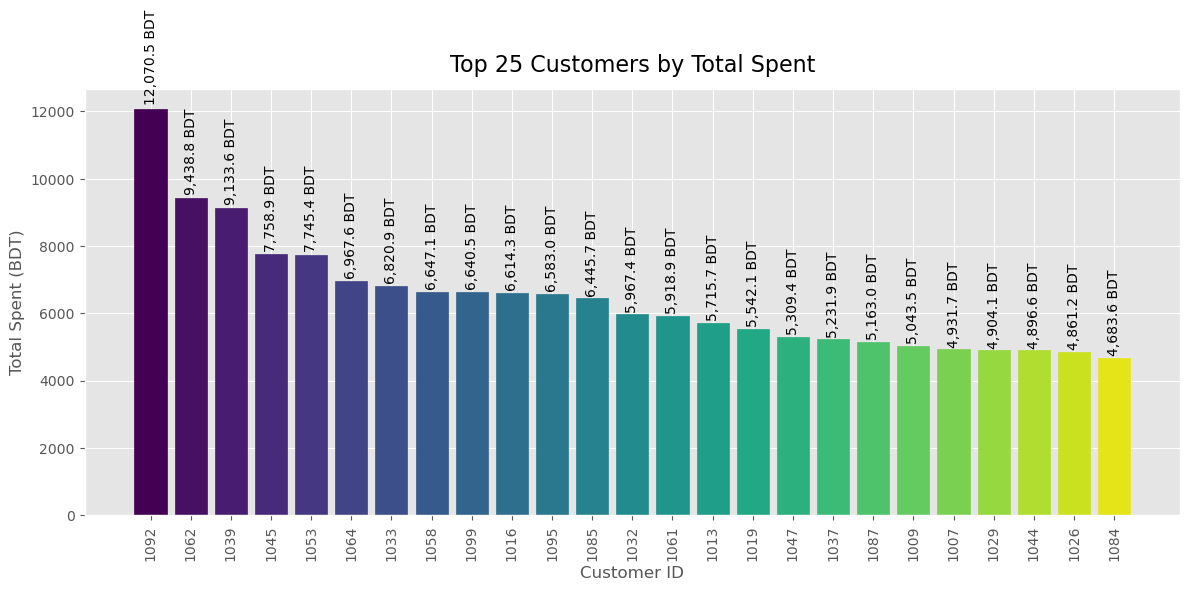

In [ ]:
top25_spent = spend_per_customer.head(25)

plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

bars = plt.bar(
    top25_spent['CustomerID'].astype(str),
    top25_spent['TotalSpent']
)
for i, bar in enumerate(bars):
    bar.set_color(plt.cm.viridis(i / len(bars)))
    spent = bar.get_height()
    label = f'{spent:,.1f} BDT'

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        spent + spent * 0.01,
        label,
        ha='center', va='bottom',
        fontsize=10,
        rotation=90 
    )

plt.title('Top 25 Customers by Total Spent', fontsize=16, pad=12)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spent (BDT)', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()
